In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import csv 

<h1>Subtasks for Data Set 3 (Auto MPG Data Set):</h1>

<body>
    <h2>Step One</h2>
    
    - First we must acquire, preprocess, and analyze the data
</body>

In [2]:
# Reading dataset into a dataframe
DataFrame = pd.read_csv('./Auto MPG Data Set/auto-mpg.data', index_col = False, header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year', 'origin', 'car-name'], delim_whitespace=True)

# As we can see from the .names file, only horsepower has missing values - there are 6 such rows without it.
# I've decided to remove these since horsepower is not categorical, and the instructions say: "You should
# remove any examples with missing or malformed features and note this in your report".

# Get names of indexes for which column horsepower has value '?'
indexNames = DataFrame[ (DataFrame['horsepower'] == '?') ].index
# Delete these row indexes from dataFrame
DataFrame.drop(indexNames , inplace=True)
# Change type of column to float now that missing values are gone
DataFrame =DataFrame.astype({'horsepower': float})


# However, now we see that car name is kind of a useless value as they all are different models.
# We will just drop it
DataFrame.drop(['car-name'] , inplace=True, axis = 1)

# Now we display the first few rows, looks good!
DataFrame.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [3]:
# Lets take a look at the data
DataFrame.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# Looks good, However, since the goal is linear classification, we must transform the dependent varible(MPG) into
# a binary choice. I will transform it into high(1) gas mileage or low(0) gas mileage, depending on whether it
# is above or below the mean value of 23.44
# this should be roughly a 50/50 split between positives and negatives
DataFrame['mpg'] = DataFrame['mpg'].apply(lambda x: 1 if (x >= 23.445918) else 0)
DataFrame['mpg'].describe()

count    392.000000
mean       0.474490
std        0.499987
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: mpg, dtype: float64

In [5]:
# Perfect, the mean is .47 so there are slightly more negatives, but roughly 50/50
# Now lets see if the features are correlated!

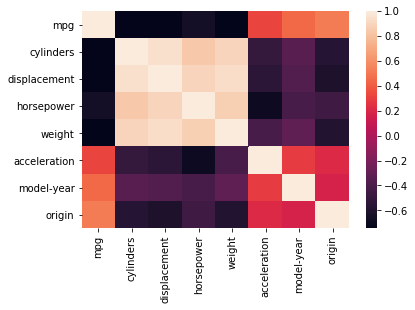

In [6]:
corr = DataFrame.corr()
sns.heatmap(corr)

In [7]:
# yes, we can see cylinders, horsepower, displacement, and weight are all very correlated,
# so I will drop 3 of the 4 since they are redundant (from my testing this greatly increased accuracy)
DataFrame.drop(['cylinders', 'horsepower', 'displacement'] , inplace=True, axis = 1)
DataFrame.head(10)

,mpg,weight,acceleration,model-year,origin
0,0,3504.0,12.0,70,1
1,0,3693.0,11.5,70,1
2,0,3436.0,11.0,70,1
3,0,3433.0,12.0,70,1
4,0,3449.0,10.5,70,1
5,0,4341.0,10.0,70,1
6,0,4354.0,9.0,70,1
7,0,4312.0,8.5,70,1
8,0,4425.0,10.0,70,1
9,0,3850.0,8.5,70,1


In [8]:
#now are data is clean and ready to use!

In [9]:
DataFrame.head(10)

,mpg,weight,acceleration,model-year,origin
0,0,3504.0,12.0,70,1
1,0,3693.0,11.5,70,1
2,0,3436.0,11.0,70,1
3,0,3433.0,12.0,70,1
4,0,3449.0,10.5,70,1
5,0,4341.0,10.0,70,1
6,0,4354.0,9.0,70,1
7,0,4312.0,8.5,70,1
8,0,4425.0,10.0,70,1
9,0,3850.0,8.5,70,1
